## Feature Extraction 코드
### 주제 1: 머신러닝 기반 매출의 영향 요인 분석
- feature: 입지, 인구 요인
    - feature Engineer: VIF 확인
- target: 깐부치킨, 생활맥주
    - 깐부치킨: 인구당 매출 > 2500 (성공), 인구당 매출 < 500 (실패)
- y = 성공 or 실패

In [37]:
## import module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 매장별 반경 500m 토지 피복 비율 데이터 Load
store_landscape = pd.read_csv("../../resources/processedData/입지특성_매장별_매장반경 500m feature.csv", encoding="utf8")

# 행정동별 토지 면적 데이터
store_landarea = pd.read_csv("../../resources/processedData/입지특성_매장별_매장반경 500m 토지피복_면적.csv", encoding="utf8")

In [2]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong = pd.DataFrame(dong_list, columns=["행정동"])

# 매장 이름 추출
store_list = list(store_dong["매장명"])
store_list

['깐부치킨(청담자이점)',
 '(주)깐부 청담본점',
 '깐부치킨(일원점)',
 '깐부치킨(역삼디오빌점)',
 '깐부치킨(강남세브란스점)',
 '깐부치킨(역삼초교점)',
 '깐부치킨(역삼GS타워점)',
 '깐부치킨 역삼본점',
 '깐부치킨(역삼럭키점)',
 '깐부치킨(강남역플래티넘점)',
 '깐부치킨(선릉역점)',
 '깐부치킨 신사가로수점',
 '깐부치킨(신사역점)',
 '깐부치킨(압구정한강고수부지)',
 '깐부치킨(압구정현대백화점)',
 '깐부치킨(수서역점)',
 '깐부치킨(청담1호점)',
 '(주)깐부치킨(세곡점)',
 '깐부치킨(강남구청역1번출구점)',
 '깐부치킨(선정릉역점)',
 '깐부치킨(삼성1동점)',
 '깐부치킨(삼성점)',
 '깐부치킨(한티점)',
 '깐부치킨(선릉역1번출구점)',
 '깐부치킨(대치사거리점)',
 '깐부치킨(삼성역점)',
 '깐부치킨(은마아파트점)',
 '깐부치킨 대치역점',
 '깐부치킨(도산사거리점)',
 '깐부치킨(강남구청역3번출구점)',
 '깐부치킨(학동역점)',
 '깐부치킨(논현역점)',
 '깐부치킨(개포점)']

In [14]:
## store feature 뽑기
store_feature = pd.merge(store_dong[["매장코드","행정동"]], store_landscape, on= "매장코드", how="right")
store_feature = pd.merge(store_feature, people[["행정동","인구수","유동인구비율"]], on = "행정동", how = "left")
store_feature = pd.merge(store_feature, store_landarea[["매장명","상업지역 면적", "문화체육휴양시설 면적", "주거지역 면적"]], on = "매장명", how = "left")
store_feature["인구당매출"] = 0

for store in store_list:
    idx = store_feature[store_feature["매장명"] == store].index
    sale = round(sales[sales["매장명"] == store]["총판매금액"].sum() / store_feature[store_feature["매장명"]==store]["인구수"].values[0], 3)
    store_feature.iloc[idx,-1] = sale

In [15]:
# 데이터 확인
store_feature

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,인구수,유동인구비율,상업지역 면적,문화체육휴양시설 면적,주거지역 면적,인구당매출
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.020672,0.577653,30014,1.42,269846.246200,13887.695540,388069.573100,2662.957
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.057290,0.779494,45160,0.94,17855.172790,6267.204868,85272.945180,279.949
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,0.187485,0.082595,0.729920,25413,1.02,45248.342350,19933.910720,176161.728700,2063.117
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.054508,0.624547,17541,2.14,171338.369400,29099.713580,333419.080700,3005.986
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,0.396986,0.601307,0.001708,35878,3.02,293097.445400,443948.759300,1260.685696,1130.038
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,0.276475,0.021761,0.701764,30291,1.29,145248.426300,11432.345920,368678.340900,862.467
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,0.336520,0.030976,0.632504,21960,2.00,182277.484400,16778.207570,342598.190300,2113.229
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.029224,0.685366,36560,1.36,122254.414300,12518.041550,293574.604000,402.694
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,0.934253,0.027802,0.037945,35878,3.02,250476.594700,7453.801107,10173.239100,1544.066
9,S41446,개포2동,깐부치킨(개포점),21,15,11,0.087827,0.161833,0.750340,14380,1.07,12692.260300,23387.247690,108435.066800,1377.086


In [28]:
## 성공 (인구당 매출 >2500), 실패 (인구당 매출 <500) 데이터 추출 (총 12개)
gganbu_target = store_feature[(store_feature["인구당매출"]>2500) | (store_feature["인구당매출"]<500)]

## Labeling 성공 = 1, 실패 = 0 
gganbu_target["y"] = 0

gganbu_target.loc[gganbu_target[gganbu_target["인구당매출"]>2500].index,["y"]] = 1
gganbu_target.loc[gganbu_target[gganbu_target["인구당매출"]<500].index,["y"]] = 0

gganbu_target

c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,인구수,유동인구비율,상업지역 면적,문화체육휴양시설 면적,주거지역 면적,인구당매출,y
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.020672,0.577653,30014,1.42,269846.246200,13887.695540,388069.57310,2662.957,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.057290,0.779494,45160,0.94,17855.172790,6267.204868,85272.94518,279.949,0
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.054508,0.624547,17541,2.14,171338.369400,29099.713580,333419.08070,3005.986,1
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.029224,0.685366,36560,1.36,122254.414300,12518.041550,293574.60400,402.694,0
13,S35539,삼성1동,깐부치킨(삼성1동점),11,7,9,0.336420,0.014737,0.648843,14811,3.02,85927.002220,3764.048150,165724.70550,2799.710,1
15,S24077,삼성1동,깐부치킨(삼성점),17,1,21,0.441027,0.000714,0.558259,14811,3.02,291346.783500,471.694235,368791.12590,2644.724,1
16,S31130,대치4동,깐부치킨(선릉역1번출구점),21,16,28,0.003526,0.392840,0.603634,20773,1.62,1386.641450,154475.671000,237365.94970,2582.010,1
20,T74630,신사동,깐부치킨(신사역점),12,8,21,0.368677,0.009862,0.621461,17541,2.14,225502.068400,6031.800876,380117.47970,3305.399,1
21,T78908,신사동,깐부치킨(압구정한강고수부지),0,0,0,0.034060,0.252276,0.713664,17541,2.14,1912.608138,14166.430270,40075.43018,393.706,0
22,S42681,신사동,깐부치킨(압구정현대백화점),12,5,9,0.386134,0.018028,0.595838,17541,2.14,259771.454000,12128.289090,400850.16200,2599.225,1


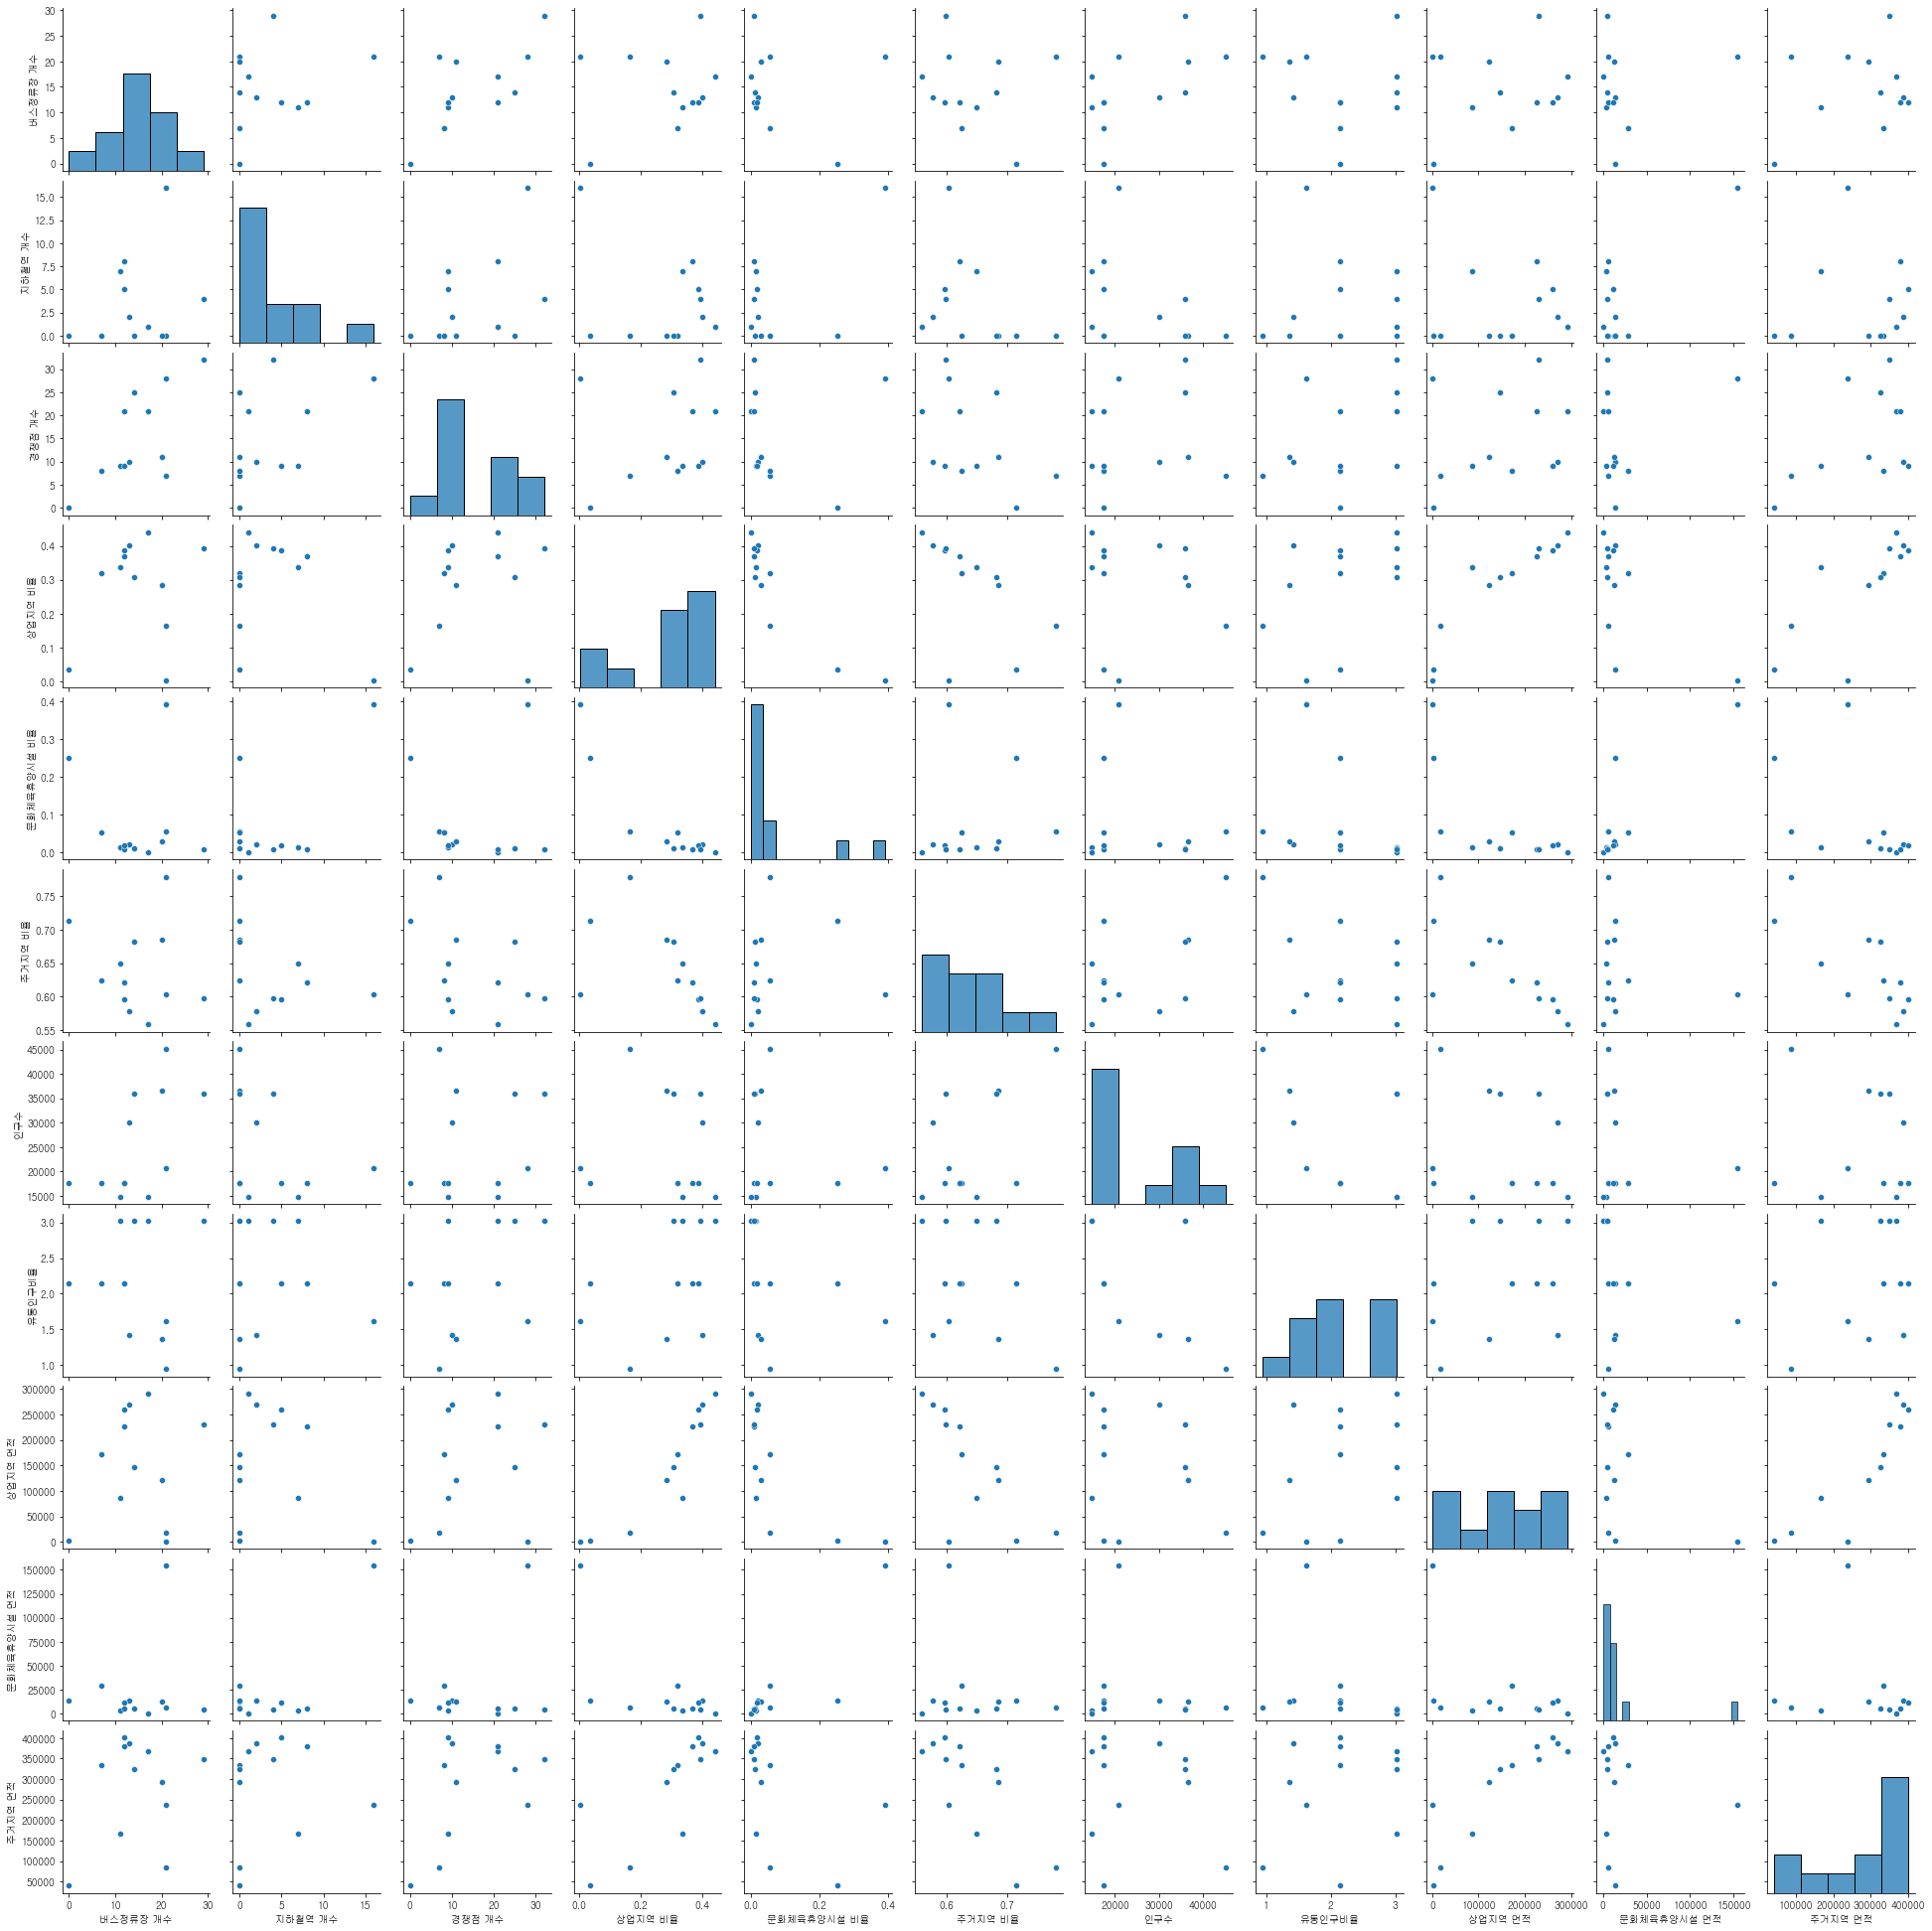

In [38]:
## Feature Engineer - VIF(Variance Inflaction Factors)를 이용한 다중공선성 판단
## Feature(독립변수) 산점도 확인
sns.pairplot(gganbu_target.iloc[:,3:-2])
plt.show()

In [78]:
gganbu_target.iloc[:,[3,4,5,6,8,9,10]]

,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,주거지역 비율,인구수,유동인구비율
0,13,2,10,0.401674,0.577653,30014,1.42
1,21,0,7,0.163217,0.779494,45160,0.94
3,7,0,8,0.320944,0.624547,17541,2.14
7,20,0,11,0.285410,0.685366,36560,1.36
13,11,7,9,0.336420,0.648843,14811,3.02
15,17,1,21,0.441027,0.558259,14811,3.02
16,21,16,28,0.003526,0.603634,20773,1.62
20,12,8,21,0.368677,0.621461,17541,2.14
21,0,0,0,0.034060,0.713664,17541,2.14
22,12,5,9,0.386134,0.595838,17541,2.14


In [77]:
## VIF 확인
# VIF 돌리기 전, scaling 진행
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
from sklearn.preprocessing import MinMaxScaler
#X_train = StandardScaler().fit_transform(gganbu_target.iloc[:,3:-2]) 
# x객체에 x를 표준화한 데이터를 저장

# VIF 확인
# 총 feature는 버스정류장 개수, 지하철역 개수, 경쟁점 개수, 상업지역 비율, 주거지역 비율, 인구수, 유동인구비율로 정해짐

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = gganbu_target.iloc[:,[3,4,5,6,8,9,10]]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    x =  StandardScaler().fit_transform(X_train)
    vif["VIF_Factors"] = [variance_inflation_factor(x, i)
                          for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factors   Feature
0     5.003414  버스정류장 개수
1     4.058858   지하철역 개수
2     6.635063    경쟁점 개수
3     3.168182   상업지역 비율
4     5.421477   주거지역 비율
5     9.026366       인구수
6     3.744301    유동인구비율


In [93]:
# 데이터 추출
gganbu = gganbu_target.iloc[:,[0,1,2,3,4,5,6,8,9,10,-2,-1]]
gganbu.to_csv("../../resources/processedData/깐부치킨_입지특성_모델_feature.csv", index=False , encoding="utf8")


In [90]:
bear = pd.read_csv("../../resources/processedData/생활맥주_입지특성_매장별_매장반경 500m feature.csv", encoding="utf8")
X_train = bear.iloc[:,[2,3,4,8,9]]
feature_engineering_XbyVIF(X_train)

,VIF_Factors,Feature
0,1.893661,버스정류장 개수
1,5.032113,지하철역 개수
2,2.091196,경쟁점 개수
3,9.180148,주거지역 비율
4,6.421375,상업지역 비율
